Generating supply chain data...
Creating analyzer...
Calculating summary statistics...
Performing scenario analysis...
Generating visualizations...


<ipython-input-7-d7c6e9372062>:140: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-7-d7c6e9372062>:171: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='date', freq='M'),


Generating report...

Saving results...

Analysis Report:

        Supply Chain Financial Impact Analysis Report
        
        1. Overall Performance Metrics
        ----------------------------
        Total Profit: $4,674,531.79
        Average Order Quantity: 1,002
        Average Lead Time: 10.6 days
        
        2. Supplier Performance
        --------------------

Supplier: SupplierA
- Total Profit: $1,571,631.50
- Average Quality Score: 89.6
- Average Lead Time: 10.6 days

Supplier: SupplierB
- Total Profit: $1,514,670.09
- Average Quality Score: 84.9
- Average Lead Time: 10.7 days

Supplier: SupplierC
- Total Profit: $1,588,230.20
- Average Quality Score: 88.0
- Average Lead Time: 10.6 days

3. Delivery Method Comparison
-------------------------

Method: Air
- Total Profit: $-419,365.38
- Average Lead Time: 2.0 days

Method: Land
- Total Profit: $1,730,995.08
- Average Lead Time: 7.5 days

Method: Sea
- Total Profit: $3,362,902.09
- Average Lead Time: 22.4 days

Scenari

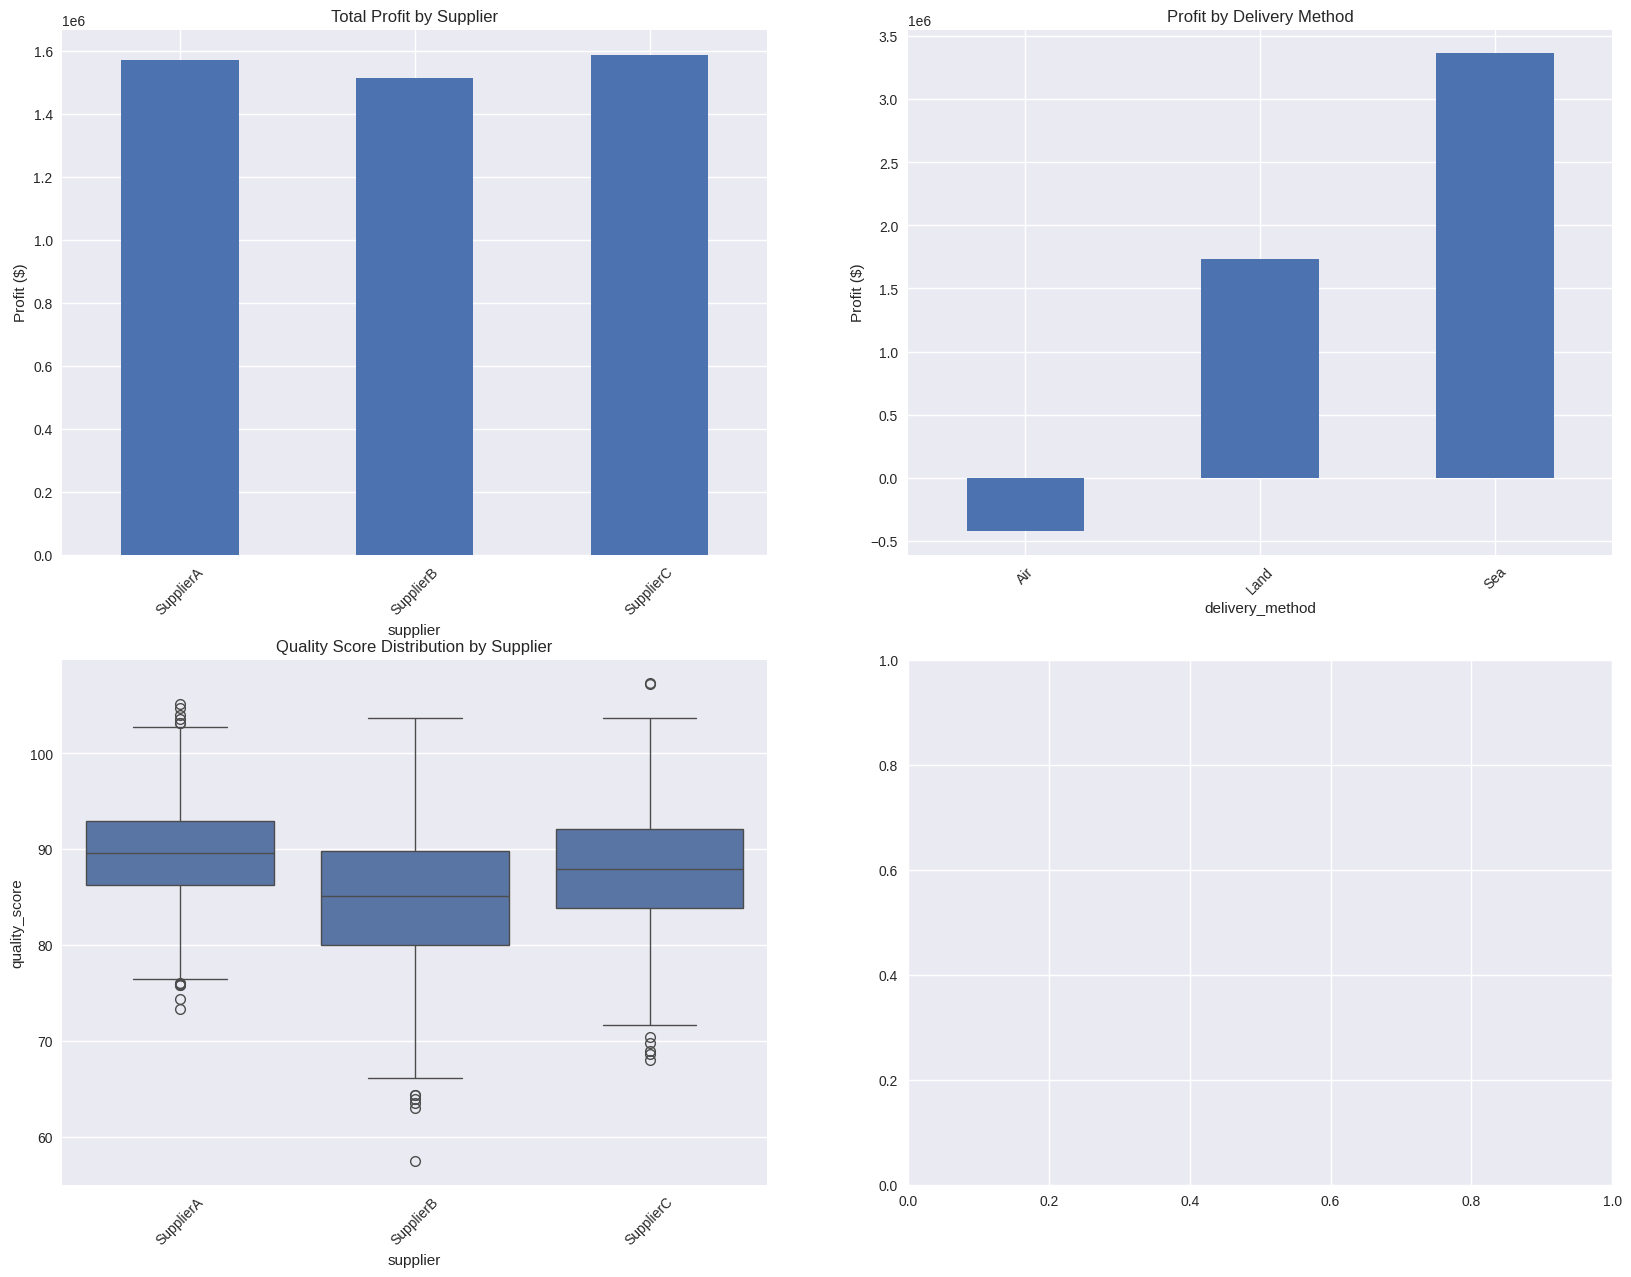

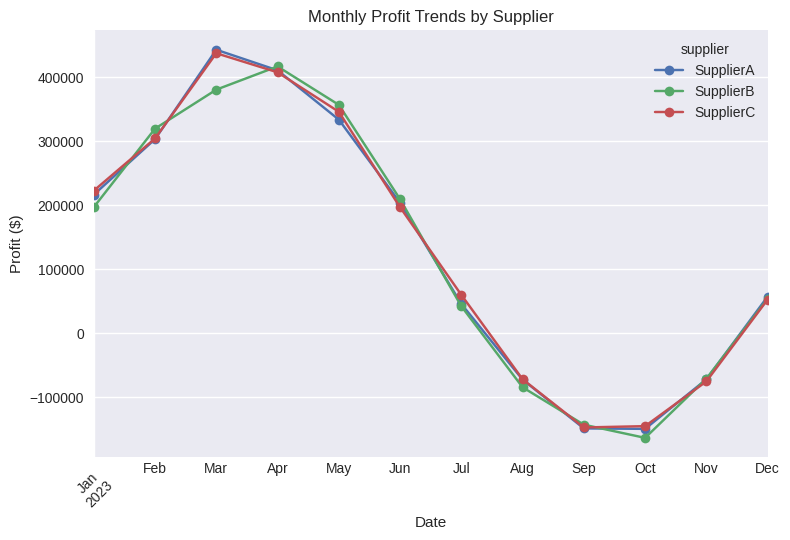

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from typing import Dict, List

# Part 1: Data Generator
def generate_supply_chain_data(start_date='2023-01-01', periods=365):
    """
    Generate synthetic supply chain and financial data
    """
    np.random.seed(42)

    # Generate dates
    dates = pd.date_range(start=start_date, periods=periods, freq='D')

    # Supplier data
    suppliers = ['SupplierA', 'SupplierB', 'SupplierC']
    delivery_methods = ['Air', 'Sea', 'Land']

    # Generate base data
    data = []
    for date in dates:
        for supplier in suppliers:
            for method in delivery_methods:
                # Base costs and variables
                order_quantity = int(np.random.normal(1000, 200))
                unit_cost = np.random.uniform(8, 15)

                # Delivery method specific costs
                delivery_costs = {
                    'Air': np.random.uniform(4, 6),
                    'Sea': np.random.uniform(1, 2),
                    'Land': np.random.uniform(2, 4)
                }

                # Lead times (days)
                lead_times = {
                    'Air': np.random.uniform(1, 3),
                    'Sea': np.random.uniform(15, 30),
                    'Land': np.random.uniform(5, 10)
                }

                # Quality scores (0-100)
                quality_scores = {
                    'SupplierA': np.random.normal(90, 5),
                    'SupplierB': np.random.normal(85, 7),
                    'SupplierC': np.random.normal(88, 6)
                }

                # Calculate costs
                delivery_cost = delivery_costs[method] * order_quantity
                total_cost = (unit_cost * order_quantity) + delivery_cost

                # Add seasonal demand variation
                seasonal_factor = 1 + 0.2 * np.sin(2 * np.pi * date.dayofyear / 365)
                demand = int(order_quantity * seasonal_factor)

                # Calculate revenue (assuming 40% markup)
                unit_price = unit_cost * 1.4
                revenue = unit_price * demand

                # Calculate profit
                profit = revenue - total_cost

                data.append({
                    'date': date,
                    'supplier': supplier,
                    'delivery_method': method,
                    'order_quantity': order_quantity,
                    'unit_cost': round(unit_cost, 2),
                    'delivery_cost': round(delivery_cost, 2),
                    'total_cost': round(total_cost, 2),
                    'lead_time': round(lead_times[method], 1),
                    'quality_score': round(quality_scores[supplier], 1),
                    'demand': demand,
                    'revenue': round(revenue, 2),
                    'profit': round(profit, 2)
                })

    return pd.DataFrame(data)

# Part 2: Analysis Class
class SupplyChainAnalyzer:
    def __init__(self, data: pd.DataFrame):
        self.data = data
        self.summary_stats = {}

    def calculate_summary_statistics(self) -> Dict:
        """Calculate key performance metrics by supplier and delivery method"""
        # Supplier performance
        supplier_metrics = self.data.groupby('supplier').agg({
            'profit': ['mean', 'sum'],
            'quality_score': 'mean',
            'lead_time': 'mean',
            'total_cost': 'sum'
        }).round(2)

        # Delivery method performance
        delivery_metrics = self.data.groupby('delivery_method').agg({
            'profit': ['mean', 'sum'],
            'lead_time': 'mean',
            'delivery_cost': 'sum'
        }).round(2)

        self.summary_stats = {
            'supplier_metrics': supplier_metrics,
            'delivery_metrics': delivery_metrics
        }
        return self.summary_stats

    def perform_scenario_analysis(self, scenarios: List[Dict]) -> pd.DataFrame:
        """Analyze different scenarios and their financial impact"""
        results = []
        baseline_profit = self.data['profit'].sum()

        for scenario in scenarios:
            filtered_data = self.data.copy()

            # Apply scenario filters
            for key, value in scenario['filters'].items():
                filtered_data = filtered_data[filtered_data[key] == value]

            # Calculate scenario impact
            scenario_profit = filtered_data['profit'].sum()
            profit_impact = scenario_profit - baseline_profit

            results.append({
                'scenario_name': scenario['name'],
                'total_profit': scenario_profit,
                'profit_impact': profit_impact,
                'profit_impact_percentage': (profit_impact / baseline_profit) * 100
            })

        return pd.DataFrame(results)

    def visualize_results(self):
        """Generate visualizations for analysis"""
        plt.style.use('seaborn')
        fig = plt.figure(figsize=(20, 15))

        # 1. Profit by Supplier
        plt.subplot(2, 2, 1)
        supplier_profits = self.data.groupby('supplier')['profit'].sum()
        supplier_profits.plot(kind='bar')
        plt.title('Total Profit by Supplier')
        plt.ylabel('Profit ($)')
        plt.xticks(rotation=45)

        # 2. Delivery Method Comparison
        plt.subplot(2, 2, 2)
        delivery_metrics = self.data.groupby('delivery_method').agg({
            'profit': 'sum',
            'lead_time': 'mean'
        })
        delivery_metrics['profit'].plot(kind='bar')
        plt.title('Profit by Delivery Method')
        plt.ylabel('Profit ($)')
        plt.xticks(rotation=45)

        # 3. Quality Score Distribution
        plt.subplot(2, 2, 3)
        sns.boxplot(x='supplier', y='quality_score', data=self.data)
        plt.title('Quality Score Distribution by Supplier')
        plt.xticks(rotation=45)

        # 4. Profit Trends Over Time
        plt.subplot(2, 2, 4)
        monthly_profits = self.data.groupby([
            pd.Grouper(key='date', freq='M'),
            'supplier'
        ])['profit'].sum().unstack()
        monthly_profits.plot(kind='line', marker='o')
        plt.title('Monthly Profit Trends by Supplier')
        plt.xlabel('Date')
        plt.ylabel('Profit ($)')
        plt.xticks(rotation=45)

        plt.tight_layout()
        return fig

    def generate_report(self) -> str:
        """Generate a summary report of the analysis"""
        stats = self.calculate_summary_statistics()

        report = f"""
        Supply Chain Financial Impact Analysis Report
        ===========================================

        1. Overall Performance Metrics
        ----------------------------
        Total Profit: ${self.data['profit'].sum():,.2f}
        Average Order Quantity: {self.data['order_quantity'].mean():,.0f}
        Average Lead Time: {self.data['lead_time'].mean():.1f} days

        2. Supplier Performance
        --------------------"""

        for supplier in stats['supplier_metrics'].index:
            report += f"\n\nSupplier: {supplier}"
            report += f"\n- Total Profit: ${stats['supplier_metrics'].loc[supplier, ('profit', 'sum')]:,.2f}"
            report += f"\n- Average Quality Score: {stats['supplier_metrics'].loc[supplier, ('quality_score', 'mean')]:.1f}"
            report += f"\n- Average Lead Time: {stats['supplier_metrics'].loc[supplier, ('lead_time', 'mean')]:.1f} days"

        report += "\n\n3. Delivery Method Comparison\n-------------------------"

        for method in stats['delivery_metrics'].index:
            report += f"\n\nMethod: {method}"
            report += f"\n- Total Profit: ${stats['delivery_metrics'].loc[method, ('profit', 'sum')]:,.2f}"
            report += f"\n- Average Lead Time: {stats['delivery_metrics'].loc[method, ('lead_time', 'mean')]:.1f} days"

        return report

# Part 3: Main execution
def main():
    # Generate data
    print("Generating supply chain data...")
    supply_chain_df = generate_supply_chain_data()

    # Create analyzer instance
    print("Creating analyzer...")
    analyzer = SupplyChainAnalyzer(supply_chain_df)

    # Calculate summary statistics
    print("Calculating summary statistics...")
    summary_stats = analyzer.calculate_summary_statistics()

    # Perform scenario analysis
    print("Performing scenario analysis...")
    scenarios = [
        {
            'name': 'Air Transport Only',
            'filters': {'delivery_method': 'Air'}
        },
        {
            'name': 'Supplier A Only',
            'filters': {'supplier': 'SupplierA'}
        },
        {
            'name': 'Sea Transport with Supplier B',
            'filters': {
                'delivery_method': 'Sea',
                'supplier': 'SupplierB'
            }
        }
    ]
    scenario_results = analyzer.perform_scenario_analysis(scenarios)

    # Generate visualizations
    print("Generating visualizations...")
    fig = analyzer.visualize_results()

    # Generate report
    print("Generating report...")
    report = analyzer.generate_report()

    # Save results
    print("\nSaving results...")
    supply_chain_df.to_csv('supply_chain_data.csv', index=False)
    scenario_results.to_csv('scenario_analysis_results.csv', index=False)
    fig.savefig('supply_chain_analysis_visualizations.png')
    with open('supply_chain_analysis_report.txt', 'w') as f:
        f.write(report)

    # Print report
    print("\nAnalysis Report:")
    print(report)

    print("\nScenario Analysis Results:")
    print(scenario_results)

    print("\nAnalysis complete! Files have been saved:")
    print("- supply_chain_data.csv")
    print("- scenario_analysis_results.csv")
    print("- supply_chain_analysis_visualizations.png")
    print("- supply_chain_analysis_report.txt")

if __name__ == "__main__":
    main()